In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df= pd.read_excel('/content/cleaningtemplate.xlsx')
df

,Holiday,Bridge,day,Date,hour,power,temperature,variable2
0,0.0,0.0,Sat,01/10/2022,00:00,14889.0,6.0,60165.0
1,0.0,0.0,Sat,01/10/2022,01:00,14812.0,5.0,56678.0
2,0.0,0.0,Sat,01/10/2022,02:00,14469.0,5.0,55780.0
3,0.0,0.0,Sat,01/10/2022,03:00,14670.0,5.0,53160.0
4,0.0,0.0,Sat,01/10/2022,04:00,14834.0,5.0,50207.0
...,...,...,...,...,...,...,...,...
1291,0.0,0.0,Wed,23/11/2022,19:00,NaN,7.0,73029.0
1292,0.0,0.0,Wed,23/11/2022,20:00,NaN,7.0,71601.0
1293,0.0,0.0,Wed,23/11/2022,21:00,NaN,7.0,67190.0
1294,0.0,0.0,Wed,23/11/2022,22:00,NaN,6.0,63621.0


**EDA:**
Exploratory Data Analysis


In [20]:
dataset = df.copy()
dataset.loc[(dataset['day'] == 'Mon'), 'day'] = 1
dataset.loc[(dataset['day'] == 'Tue'), 'day'] = 2
dataset.loc[(dataset['day'] == 'Wed'), 'day'] = 3          
dataset.loc[(dataset['day'] == 'Thu'), 'day'] = 4
dataset.loc[(dataset['day'] == 'Fri'), 'day'] = 5
dataset.loc[(dataset['day'] == 'Sat'), 'day'] = 6
dataset.loc[(dataset['day'] == 'Sun'), 'day'] = 7

dataset['day'] = dataset['day'].astype(str).astype(int)
# Remove bridge and holiday
dataset = dataset.drop(['Bridge'], axis = 1)
dataset = dataset.drop(['Holiday'], axis = 1)
colname = dataset.columns
headers = colname.tolist()
other_features = []
other_features = headers[6:8]

In [21]:
dataset


,day,Date,hour,power,temperature,variable2
0,6,01/10/2022,00:00,14889.0,6.0,60165.0
1,6,01/10/2022,01:00,14812.0,5.0,56678.0
2,6,01/10/2022,02:00,14469.0,5.0,55780.0
3,6,01/10/2022,03:00,14670.0,5.0,53160.0
4,6,01/10/2022,04:00,14834.0,5.0,50207.0
...,...,...,...,...,...,...
1291,3,23/11/2022,19:00,NaN,7.0,73029.0
1292,3,23/11/2022,20:00,NaN,7.0,71601.0
1293,3,23/11/2022,21:00,NaN,7.0,67190.0
1294,3,23/11/2022,22:00,NaN,6.0,63621.0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          1296 non-null   int64  
 1   Date         1296 non-null   object 
 2   hour         1296 non-null   object 
 3   power        1128 non-null   float64
 4   temperature  1296 non-null   float64
 5   variable2    1296 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 60.9+ KB


In [27]:
from datetime import date
# Train Test Split Dataset
dataframe = dataset.reset_index(drop=True)
dtlist = dataframe.iloc[:,1]
pdate = []
for cdt in dtlist:
  spdt = cdt.split("/")
  d = date(int(spdt[2]), int(spdt[1]), int(spdt[0]))
  p = pd.to_datetime(d)
  pdate.append(p)

stime = dataframe.iloc[:,2]
pt = pd.to_datetime(stime, errors="coerce", format="%H:%M").dt
ptime = pt.time
dataframe.insert(loc=1, column='date', value=pdate)
dataframe.insert(loc=2, column='time', value=ptime)
# Drop custom date and time column 
dataframe = dataframe.drop(['Date'], axis=1)
dataframe = dataframe.drop(['hour'], axis=1)

data = dataframe

data.insert(loc=1, column='datetime', value=data.date.astype(str)+' '+data.time.astype(str))
data.insert(loc=1,column = 'year', value =data['date'].dt.year)
data.insert(loc=2,column = 'month', value =data['date'].dt.month)
data.insert(loc=3,column = 'dt', value =data['date'].dt.day)
data.insert(loc=4,column = 'hour', value =data['date'].dt.hour)
data = data.reset_index()

data['day'] = data['date'].apply(lambda x :1 if x.weekday() == 6 else x.weekday() + 2)
print("day :", data['day'])
data['season'] = data['date'].apply(lambda mdt: (mdt.month%12 + 3)//3)
data['working_day'] = data['day'].apply(lambda x: 0 if x in [7, 1] else 1)
data['week_end'] = data['day'].apply(lambda x: 1 if x in [7, 1] else 0)

trend = -1
data['idx'] = [i for i in data.index.values]
# Trend and idx_jr


day : 0       7
1       7
2       7
3       7
4       7
       ..
1291    4
1292    4
1293    4
1294    4
1295    4
Name: day, Length: 1296, dtype: int64


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        1296 non-null   int64         
 1   day          1296 non-null   int64         
 2   year         1296 non-null   int64         
 3   month        1296 non-null   int64         
 4   dt           1296 non-null   int64         
 5   hour         1296 non-null   int64         
 6   datetime     1296 non-null   object        
 7   date         1296 non-null   datetime64[ns]
 8   time         1296 non-null   object        
 9   power        1128 non-null   float64       
 10  temperature  1296 non-null   float64       
 11  variable2    1296 non-null   float64       
 12  season       1296 non-null   int64         
 13  working_day  1296 non-null   int64         
 14  week_end     1296 non-null   int64         
 15  idx          1296 non-null   int64         
dtypes: dat

In [31]:
data

,index,day,year,month,dt,hour,datetime,date,time,power,temperature,variable2,season,working_day,week_end,idx
0,0,7,2022,10,1,0,2022-10-01 00:00:00,2022-10-01,00:00:00,14889.0,6.0,60165.0,4,0,1,0
1,1,7,2022,10,1,0,2022-10-01 01:00:00,2022-10-01,01:00:00,14812.0,5.0,56678.0,4,0,1,1
2,2,7,2022,10,1,0,2022-10-01 02:00:00,2022-10-01,02:00:00,14469.0,5.0,55780.0,4,0,1,2
3,3,7,2022,10,1,0,2022-10-01 03:00:00,2022-10-01,03:00:00,14670.0,5.0,53160.0,4,0,1,3
4,4,7,2022,10,1,0,2022-10-01 04:00:00,2022-10-01,04:00:00,14834.0,5.0,50207.0,4,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,1291,4,2022,11,23,0,2022-11-23 19:00:00,2022-11-23,19:00:00,NaN,7.0,73029.0,4,1,0,1291
1292,1292,4,2022,11,23,0,2022-11-23 20:00:00,2022-11-23,20:00:00,NaN,7.0,71601.0,4,1,0,1292
1293,1293,4,2022,11,23,0,2022-11-23 21:00:00,2022-11-23,21:00:00,NaN,7.0,67190.0,4,1,0,1293
1294,1294,4,2022,11,23,0,2022-11-23 22:00:00,2022-11-23,22:00:00,NaN,6.0,63621.0,4,1,0,1294


In [32]:
data.index

RangeIndex(start=0, stop=1296, step=1)

In [33]:
# Helper Functions
def set_trend(x, gap):
  global trend
  date = x['date']
  # print("set trend :", x['date'], type(x['date']))
  # date = datetime.strptime(x['date'], "%Y-%m-%d")
  # print("set trend :", date, type(date))
  if x['idx'] == 0:
    trend = (date - pd.to_datetime('01-01-{}'.format(date.year))).days * gap
  else:
    trend = 0 if [date.day, date.month, date.hour, date.minute, date.second] == [1, 1, 0, 0,0] else trend + 1
  return trend

def set_idx_jr(x):
  global i
  date = x['date']

  if x['idx'] == 0:
      i = (date - pd.to_datetime('{}-{}-{}'.format(date.day, date.month, date.year),
                                  format='%d-%m-%Y')).seconds / 1800
      print()
      indexof_hour = (date - pd.to_datetime('{}-{}-{}'.format(date.day, date.month, date.year),
                                  format='%d-%m-%Y')).seconds / 1800
      # print("i = (date - pd.to_datetime('{}-{}-{}'.format(date.day, date.month, date.year), format='%d-%m-%Y')).seconds / 1800:",  indexof_hour)
  else:
      i = 0 if date.hour + date.minute + date.second == 0 else i + 1
      # print("i = 0 if date.hour + date.minute + date.second == 0 else i + 1:",i)
  return i

def func_j(data, j,x, x_header,gap ):
  """func_j7, func_j14, func_j21 merge into one """
  try:
    # print("func-J OUTPUT :", data.loc[x['idx'] - j * gap, x_header])
    return data.loc[x['index'] - j * gap, x_header]

  except KeyError:
    return float('nan')

In [34]:
gap = 24
data['trend'] = data.apply(lambda x: set_trend(x, gap), axis=1)
# print("set trend :", data["trend"])
i = -1
gap=24
data['idx_jr'] = data.apply(lambda x: set_idx_jr(x), axis=1)
data['consoj-7'] = data.apply(lambda x: func_j(data, 7,x,"power", gap), axis=1)
data['consoj-7'] = data['consoj-7'].fillna(0)
data.fillna(0)
data = data.iloc[168:]
X = data
print(X)


      index  day  year  month  dt  hour             datetime       date  \
168     168    7  2022     10   8     0  2022-10-08 00:00:00 2022-10-08   
169     169    7  2022     10   8     0  2022-10-08 01:00:00 2022-10-08   
170     170    7  2022     10   8     0  2022-10-08 02:00:00 2022-10-08   
171     171    7  2022     10   8     0  2022-10-08 03:00:00 2022-10-08   
172     172    7  2022     10   8     0  2022-10-08 04:00:00 2022-10-08   
...     ...  ...   ...    ...  ..   ...                  ...        ...   
1291   1291    4  2022     11  23     0  2022-11-23 19:00:00 2022-11-23   
1292   1292    4  2022     11  23     0  2022-11-23 20:00:00 2022-11-23   
1293   1293    4  2022     11  23     0  2022-11-23 21:00:00 2022-11-23   
1294   1294    4  2022     11  23     0  2022-11-23 22:00:00 2022-11-23   
1295   1295    4  2022     11  23     0  2022-11-23 23:00:00 2022-11-23   

          time    power  temperature  variable2  season  working_day  \
168   00:00:00  18342.0   

In [35]:
# Drop column from X
dt_time = X["datetime"]
X = X.drop(["power", "datetime","date", "time"], axis=1)
X.replace(np.nan, 0)

Y = data["power"]

# Get last index for the last availbe power values in given dataset
last_empty_power_index = dataframe["power"].last_valid_index()
print(last_empty_power_index)

1127


In [38]:
test_period = 7*24

x_known = X[X.index <= last_empty_power_index]

x_unknown = X.iloc[len(x_known):len(X)]
y_known = Y[Y.index <= last_empty_power_index]
y_unknown = Y.iloc[len(y_known):len(Y)]


**Spliting Data into Train-Test**

1. Splitting Data into Training set and a Test set
2. We will use Test set in the final evaluation of our model. 
x_known, x_unknown = Temperature and variable for Train and validation
y_known, y_unknown = Power for known and unknown period

In [39]:
x_known, x_unknown

(      index  day  year  month  dt  hour  temperature  variable2  season  \
 168     168    7  2022     10   8     0          7.0    66360.0       4   
 169     169    7  2022     10   8     0          7.0    61631.0       4   
 170     170    7  2022     10   8     0          7.0    60472.0       4   
 171     171    7  2022     10   8     0          7.0    58258.0       4   
 172     172    7  2022     10   8     0          7.0    56299.0       4   
 ...     ...  ...   ...    ...  ..   ...          ...        ...     ...   
 1123   1123    4  2022     11  16     0          1.0    80676.0       4   
 1124   1124    4  2022     11  16     0          0.0    79188.0       4   
 1125   1125    4  2022     11  16     0         -1.0    74911.0       4   
 1126   1126    4  2022     11  16     0         -1.0    71606.0       4   
 1127   1127    4  2022     11  16     0         -2.0    75092.0       4   
 
       working_day  week_end   idx  trend  idx_jr  consoj-7  
 168             0      

In [40]:
y_known, y_unknown

(168     18342.0
 169     18494.0
 170     18089.0
 171     17838.0
 172     18298.0
          ...   
 1123    23320.0
 1124    22946.0
 1125    21309.0
 1126    21319.0
 1127    20764.0
 Name: power, Length: 960, dtype: float64, 1128   NaN
 1129   NaN
 1130   NaN
 1131   NaN
 1132   NaN
         ..
 1291   NaN
 1292   NaN
 1293   NaN
 1294   NaN
 1295   NaN
 Name: power, Length: 168, dtype: float64)

**Inspecting the Data**

joint distributions of a few pairs of columns from the training set.

In [41]:
import seaborn as sns

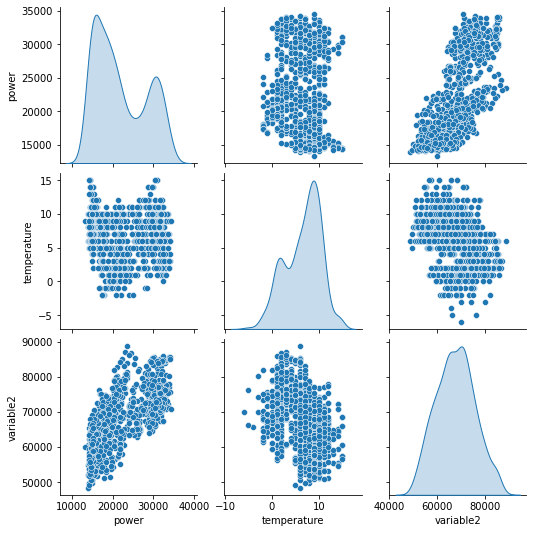

In [43]:
sns.pairplot(data[["power","temperature","variable2"]], diag_kind="kde") # kde = Kernel Density Estimation : These are smooth histograms.

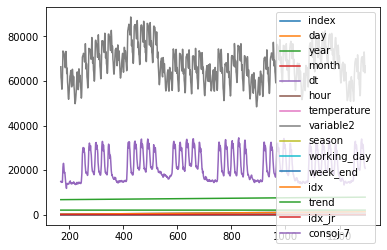

In [45]:
X.plot()

In [49]:
X.head() , X.tail()

(     index  day  year  month  dt  hour  temperature  variable2  season  \
 168    168    7  2022     10   8     0          7.0    66360.0       4   
 169    169    7  2022     10   8     0          7.0    61631.0       4   
 170    170    7  2022     10   8     0          7.0    60472.0       4   
 171    171    7  2022     10   8     0          7.0    58258.0       4   
 172    172    7  2022     10   8     0          7.0    56299.0       4   
 
      working_day  week_end  idx  trend  idx_jr  consoj-7  
 168            0         1  168   6720     0.0   14889.0  
 169            0         1  169   6721     0.0   14812.0  
 170            0         1  170   6722     0.0   14469.0  
 171            0         1  171   6723     0.0   14670.0  
 172            0         1  172   6724     0.0   14834.0  ,
       index  day  year  month  dt  hour  temperature  variable2  season  \
 1291   1291    4  2022     11  23     0          7.0    73029.0       4   
 1292   1292    4  2022     11  23 

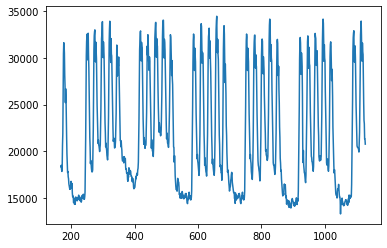

In [46]:
Y.plot()

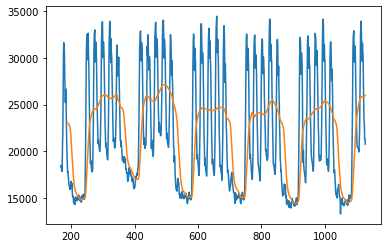

In [81]:
plt.plot(Y)
plt.plot(y_known.rolling(window=24).mean())

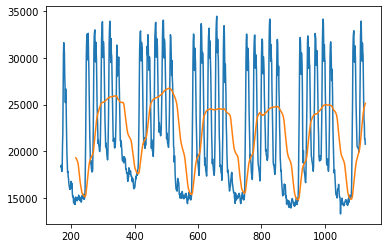

In [82]:
plt.plot(Y)
plt.plot(y_known.rolling(window=48).mean())

In [86]:
x_known.head(), x_known.tail(), x_unknown.head(), x_unknown.tail()

(     index  day  year  month  dt  hour  temperature  variable2  season  \
 168    168    7  2022     10   8     0          7.0    66360.0       4   
 169    169    7  2022     10   8     0          7.0    61631.0       4   
 170    170    7  2022     10   8     0          7.0    60472.0       4   
 171    171    7  2022     10   8     0          7.0    58258.0       4   
 172    172    7  2022     10   8     0          7.0    56299.0       4   
 
      working_day  week_end  idx  trend  idx_jr  consoj-7  
 168            0         1  168   6720     0.0   14889.0  
 169            0         1  169   6721     0.0   14812.0  
 170            0         1  170   6722     0.0   14469.0  
 171            0         1  171   6723     0.0   14670.0  
 172            0         1  172   6724     0.0   14834.0  ,
       index  day  year  month  dt  hour  temperature  variable2  season  \
 1123   1123    4  2022     11  16     0          1.0    80676.0       4   
 1124   1124    4  2022     11  16 

In [85]:
y_known.head(), y_known.tail(), y_unknown.head(), y_unknown.tail()

(168    18342.0
 169    18494.0
 170    18089.0
 171    17838.0
 172    18298.0
 Name: power, dtype: float64, 1123    23320.0
 1124    22946.0
 1125    21309.0
 1126    21319.0
 1127    20764.0
 Name: power, dtype: float64, 1128   NaN
 1129   NaN
 1130   NaN
 1131   NaN
 1132   NaN
 Name: power, dtype: float64, 1291   NaN
 1292   NaN
 1293   NaN
 1294   NaN
 1295   NaN
 Name: power, dtype: float64)

In [55]:
# Split Dataset
## Train Dataset
x_train = x_known.iloc[0:len(x_known)-test_period]
y_train = y_known.iloc[0:len(y_known)-test_period]

x_test = x_known.iloc[len(x_known)-test_period: len(x_known)]
y_test = y_known.iloc[len(y_known)-test_period: len(y_known)]
print(x_test)




      index  day  year  month  dt  hour  temperature  variable2  season  \
960     960    5  2022     11  10     0          2.0    68562.0       4   
961     961    5  2022     11  10     0          2.0    64094.0       4   
962     962    5  2022     11  10     0          2.0    63122.0       4   
963     963    5  2022     11  10     0          2.0    61003.0       4   
964     964    5  2022     11  10     0          2.0    59159.0       4   
...     ...  ...   ...    ...  ..   ...          ...        ...     ...   
1123   1123    4  2022     11  16     0          1.0    80676.0       4   
1124   1124    4  2022     11  16     0          0.0    79188.0       4   
1125   1125    4  2022     11  16     0         -1.0    74911.0       4   
1126   1126    4  2022     11  16     0         -1.0    71606.0       4   
1127   1127    4  2022     11  16     0         -2.0    75092.0       4   

      working_day  week_end   idx  trend  idx_jr  consoj-7  
960             1         0   960   75

In [93]:
print(y_train),print(y_test)

168    18342.0
169    18494.0
170    18089.0
171    17838.0
172    18298.0
        ...   
955    22455.0
956    21019.0
957    19465.0
958    19330.0
959    18892.0
Name: power, Length: 792, dtype: float64
960     18832.0
961     18479.0
962     18068.0
963     17859.0
964     18363.0
         ...   
1123    23320.0
1124    22946.0
1125    21309.0
1126    21319.0
1127    20764.0
Name: power, Length: 168, dtype: float64


(None, None)

**The Model**

Using Sequential model with two densely connected hidden layers, and an output layers that returns a single, continous value. 
The model building steps are wrapped in a function, build_model.

error used : **mse** = mean squared error

optimizers used : RMSprop

**RMSprop:**The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 

In [94]:
len(x_train.keys())

15

In [95]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [96]:
def build_model():
              model= keras.Sequential([
              layers.Dense(200, activation=tf.nn.relu, input_shape=[len(x_train.keys())]),
              layers.Dense(200, activation=tf.nn.relu),
              layers.Dense(1)
              ])
            
              optimizer= tf.keras.optimizers.RMSprop(0.001)

              model.compile(loss='mse',
                           optimizer= optimizer,
                           metrics=['mae', 'mse'])
              return model

In [97]:
model= build_model()

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               3200      
                                                                 
 dense_7 (Dense)             (None, 200)               40200     
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 43,601
Trainable params: 43,601
Non-trainable params: 0
_________________________________________________________________


**Train the model**

Train the model for 20 epochs, and record the training and validation accuracy in the history object.

In [99]:
# Display training progres by printing a single dot for each completed epoch
model_history= model.fit(x_train,
                         y_train, 
                         epochs=500,
                         validation_data = ( x_test, y_test ))


Epoch 1/500
25/25 [==============================] - 1s 9ms/step - loss: 61165352.0000 - mae: 4631.1060 - mse: 61165352.0000 - val_loss: 10571598.0000 - val_mae: 2717.9114 - val_mse: 10571598.0000
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 11080716.0000 - mae: 2693.0315 - mse: 11080716.0000 - val_loss: 7612650.0000 - val_mae: 2114.6309 - val_mse: 7612650.0000
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 8943777.0000 - mae: 2462.3335 - mse: 8943777.0000 - val_loss: 2675908.5000 - val_mae: 1358.5310 - val_mse: 2675908.5000
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 8818228.0000 - mae: 2413.7026 - mse: 8818228.0000 - val_loss: 25075942.0000 - val_mae: 4712.4385 - val_mse: 25075942.0000
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 8236544.0000 - mae: 2344.5774 - mse: 8236544.0000 - val_loss: 2934121.0000 - val_mae: 1333.4656 - val_mse: 2934121.0000
Epoch 6/500
25/25 [========

Evaluation the model

In [101]:
mae_test= model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 1550501.1250 - mae: 879.3740 - mse: 1550501.1250


In [102]:
model_history.history

{'loss': [61165352.0,
  11080716.0,
  8943777.0,
  8818228.0,
  8236544.0,
  6023508.5,
  6574285.0,
  6864666.0,
  6021493.5,
  5667215.5,
  5249685.5,
  5254211.0,
  4538106.5,
  5274648.0,
  4471610.5,
  5270310.5,
  4110102.0,
  4474986.0,
  4684441.0,
  3992274.75,
  4097848.25,
  4149939.75,
  3881973.75,
  4232287.5,
  4010267.5,
  3808099.25,
  4142062.5,
  3756632.25,
  3768401.75,
  3799846.5,
  3579247.75,
  3848331.25,
  3633956.75,
  3188676.75,
  3941222.5,
  3636824.25,
  3628015.5,
  3296872.75,
  3644663.5,
  3591952.75,
  3059645.75,
  3933408.0,
  3414200.0,
  3332759.25,
  3499954.0,
  3505780.0,
  3184832.25,
  3418964.0,
  3115597.5,
  3140528.25,
  3559777.0,
  3330451.0,
  3173295.75,
  3200231.75,
  3268360.0,
  3341249.25,
  3353855.0,
  3407364.0,
  3213075.75,
  3189654.75,
  2984883.75,
  3573545.0,
  3264269.5,
  3358620.5,
  3340863.0,
  3052677.5,
  3262013.75,
  3255424.0,
  2943543.5,
  3357998.5,
  3128608.25,
  3186955.25,
  3211643.5,
  2943916.0,
 

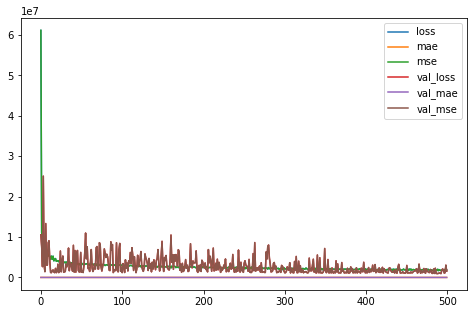

In [110]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid= True
# plt.gca().set_ylim(0,1)

In [104]:
plt.show()

Prediction

In [119]:
# x_new=x_test[:1127]
# y_pred=model.predict(x_new)
# print(y_pred)
# print(y_test[:1127])

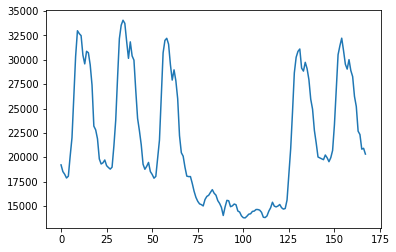

In [123]:
x_new=x_unknown
y_pred=model.predict(x_new)
plt.plot(y_pred)

In [129]:
print(y_pred)
y_pred1d = y_pred.flatten() #flatten `array_2d`
print(y_pred1d)

[[19218.998 ]
 [18533.355 ]
 [18254.254 ]
 [17874.746 ]
 [18056.84  ]
 [20098.611 ]
 [21997.125 ]
 [26125.86  ]
 [30352.676 ]
 [32977.754 ]
 [32683.07  ]
 [32478.031 ]
 [30477.578 ]
 [29578.943 ]
 [30871.543 ]
 [30719.34  ]
 [29478.86  ]
 [27401.496 ]
 [23193.969 ]
 [22810.502 ]
 [21892.068 ]
 [19829.139 ]
 [19312.262 ]
 [19430.344 ]
 [19720.865 ]
 [19140.955 ]
 [18948.773 ]
 [18786.457 ]
 [18986.844 ]
 [21161.96  ]
 [23803.559 ]
 [28114.94  ]
 [32158.75  ]
 [33543.645 ]
 [34055.312 ]
 [33734.625 ]
 [31872.031 ]
 [30147.994 ]
 [31837.594 ]
 [30395.734 ]
 [29962.955 ]
 [26849.617 ]
 [23989.227 ]
 [22727.266 ]
 [21289.004 ]
 [19285.793 ]
 [18770.453 ]
 [19073.271 ]
 [19470.016 ]
 [18534.346 ]
 [18240.84  ]
 [17854.352 ]
 [18039.951 ]
 [19856.787 ]
 [21758.28  ]
 [26331.105 ]
 [30712.045 ]
 [31988.908 ]
 [32206.22  ]
 [31599.604 ]
 [29519.705 ]
 [27917.36  ]
 [28967.172 ]
 [27841.53  ]
 [26002.223 ]
 [22213.176 ]
 [20466.924 ]
 [20114.295 ]
 [18979.191 ]
 [18068.73  ]
 [18017.043 ]
 [1802

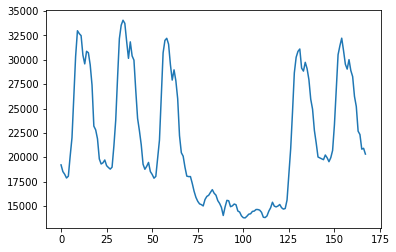

In [130]:
plt.plot(y_pred1d)

In [133]:
pd.DataFrame(y_pred1d).to_excel('test.xlsx', sheet_name='sheet1', index=False)
# plt.plot(y_pred)
# plt.plot(y_test[:1127])

**Forecasting for the unknown period**

will apply different-different time related forecasting algorithem to have aa better prediction

In [112]:
# test_period = 7*24

# x_known = X[X.index <= last_empty_power_index]

# x_unknown = X.iloc[len(x_known):len(X)]
# y_known = Y[Y.index <= last_empty_power_index]
# y_unknown = Y.iloc[len(y_known):len(Y)]


In [113]:
# # Split Dataset
# ## Train Dataset
# x_train = x_known.iloc[0:len(x_known)-test_period]
# y_train = y_known.iloc[0:len(y_known)-test_period]

# x_test = x_known.iloc[len(x_known)-test_period: len(x_known)]
# y_test = y_known.iloc[len(y_known)-test_period: len(y_known)]
# print(x_test)

In [ ]:
y_power= Y[Y.]

In [ ]:
# [:1297].to_excel('test.xlsx', sheet_name='Sheet1', index=False)
# plt.plot(test_labels[:1297])